# CAPSTONE PROJECT BENGKEL KODING DATA SCIENCE
## Dataset : Obesitas

## Nama : Firman Naufal Aryaputra
## NIM : A11.2022.14181
## Kelas : DS01


# 1.Import Library

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Others
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Analisis Data Eksploratori (EDA)

### 1.1 Memuat Data dan Menampilkan Informasi Dasar

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/ObesityDataSet.csv')
print("=" * 30)
print("INFORMASI UMUM DATASET")
print("=" * 30)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nNama kolom: {list(df.columns)}")

INFORMASI UMUM DATASET
Jumlah baris: 2111
Jumlah kolom: 17

Nama kolom: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [9]:
print("Menampilkan 5 data dari dataset")
df.head(5)

Menampilkan 5 data dari dataset


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
print("\n" + "=" * 60)
print("INFORMASI TIPE DATA")
print("=" * 60)
print(df.info())


INFORMASI TIPE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                        

In [11]:
print("\n" + "=" * 60)
print("DESKRIPSI STATISTIK VARIABEL NUMERIK")
print("=" * 60)
display(df.describe())


DESKRIPSI STATISTIK VARIABEL NUMERIK


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


### 2.2 Nilai yang Hilang dan Analisis Kualitas Data

In [15]:
# Periksa nilai yang hilang dan '?' sebagai indikator yang hilang
print("=" * 50)
print("ANALISIS Missing Values")
print("=" * 50)
missing_explicit = df.isnull().sum()
print("Missing values (NaN):")
print(missing_explicit[missing_explicit > 0])

ANALISIS Missing Values
Missing values (NaN):
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
dtype: int64


In [16]:
# Periksa '?' sebagai nilai yang hilang
print("\nNilai yang hilang direpresentasikan sebagai '?':")
for col in df.columns:
    question_count = (df[col] == '?').sum()
    if question_count > 0:
        print(f"{col}: {question_count} ('?' values)")


Missing values represented as '?':
Age: 8 ('?' values)
Gender: 13 ('?' values)
Height: 10 ('?' values)
Weight: 8 ('?' values)
CALC: 15 ('?' values)
FAVC: 11 ('?' values)
FCVC: 10 ('?' values)
NCP: 10 ('?' values)
SCC: 8 ('?' values)
SMOKE: 8 ('?' values)
CH2O: 9 ('?' values)
family_history_with_overweight: 10 ('?' values)
FAF: 11 ('?' values)
TUE: 6 ('?' values)
CAEC: 7 ('?' values)
MTRANS: 6 ('?' values)


In [17]:
# Periksa nilai unik untuk setiap kolom, tangani potensi tipe campuran untuk pengurutan
print("\n" + "=" * 60)
print("NILAI UNIK PER KOLOM")
print("=" * 60)
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} nilai unik")
    if unique_vals <= 10:
        try:
            # Mencoba mengurutkan, mengonversi elemen ke string hanya untuk tujuan tampilan/pengurutan
            # Ini mencegah TypeError jika ada tipe campuran seperti float (NaN) dan string
            print(f" Values: {sorted([str(item) for item in df[col].unique()])}")
        except Exception as e:
            print(f" Tidak dapat menampilkan nilai unik untuk pengurutan: {e}")


NILAI UNIK PER KOLOM
Age: 1394 nilai unik
Gender: 3 nilai unik
 Values: ['?', 'Female', 'Male', 'nan']
Height: 1562 nilai unik
Weight: 1518 nilai unik
CALC: 5 nilai unik
 Values: ['?', 'Always', 'Frequently', 'Sometimes', 'nan', 'no']
FAVC: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
FCVC: 808 nilai unik
NCP: 637 nilai unik
SCC: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
SMOKE: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
CH2O: 1263 nilai unik
family_history_with_overweight: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
FAF: 1186 nilai unik
TUE: 1130 nilai unik
CAEC: 5 nilai unik
 Values: ['?', 'Always', 'Frequently', 'Sometimes', 'nan', 'no']
MTRANS: 6 nilai unik
 Values: ['?', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking', 'nan']
NObeyesdad: 7 nilai unik
 Values: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


In [18]:
# Check for duplicates
print("\n" + "=" * 60)
print("ANALISIS DATA DUPLIKAT")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
if duplicates > 0:
    print("\nContoh baris duplikat:")
    display(df[df.duplicated()].head())


ANALISIS DATA DUPLIKAT
Jumlah baris duplikat: 18

Contoh baris duplikat:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight


### 2.3 Analisis Variabel Target

In [19]:
# Analyze target variable distribution
print("=" * 60)
print("DISTRIBUSI TARGET VARIABLE (NObeyesdad)")
print("=" * 60)

target_dist = df['NObeyesdad'].value_counts()
target_pct = df['NObeyesdad'].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Count': target_dist,
    'Percentage': target_pct.round(2)
})

print(target_summary)

DISTRIBUSI TARGET VARIABLE (NObeyesdad)
                     Count  Percentage
NObeyesdad                            
Obesity_Type_I         351       16.63
Obesity_Type_III       324       15.35
Obesity_Type_II        297       14.07
Overweight_Level_I     290       13.74
Overweight_Level_II    290       13.74
Normal_Weight          287       13.60
Insufficient_Weight    272       12.88


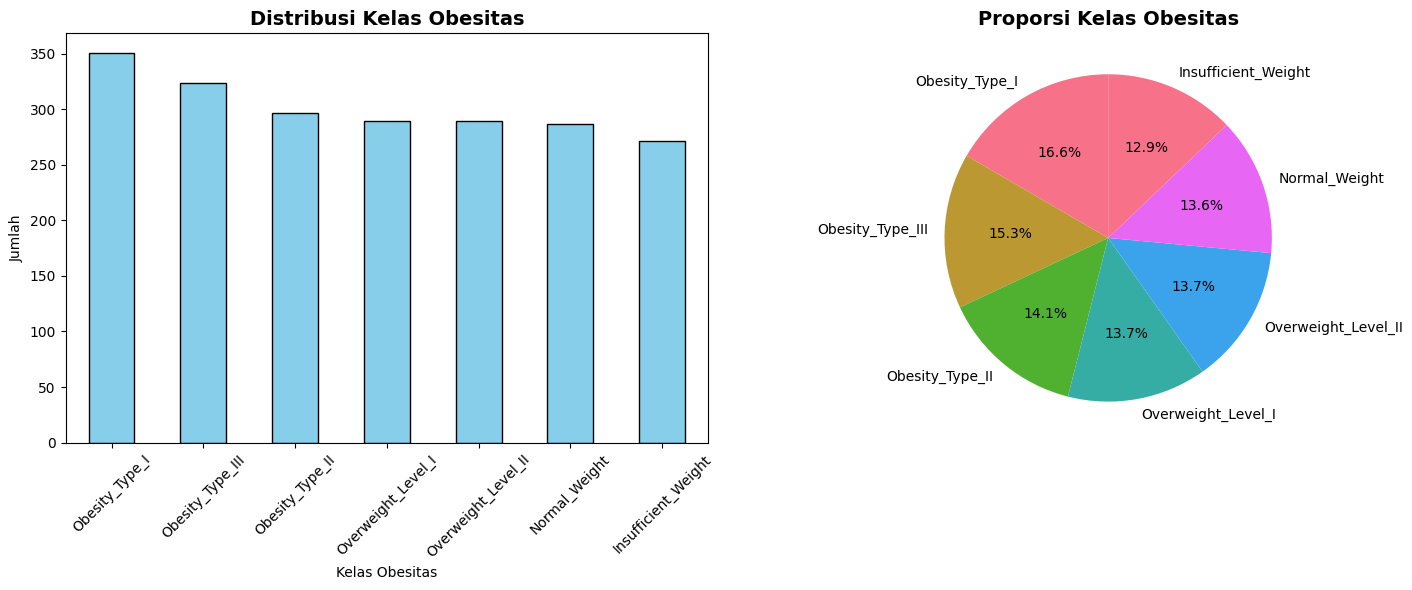

In [20]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_dist.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Kelas Obesitas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kelas Obesitas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporsi Kelas Obesitas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
# Check for class imbalance
min_class = target_dist.min()
max_class = target_dist.max()
imbalance_ratio = max_class / min_class
print(f"\nImbalance ratio: {imbalance_ratio:.2f} (ideal: close to 1.0)")
if imbalance_ratio > 2:
    print("⚠️ Dataset memiliki ketidakseimbangan kelas yang signifikan")
else:
    print("✅ Dataset relatif seimbang")


Imbalance ratio: 1.29 (ideal: close to 1.0)
✅ Dataset relatif seimbang


### 2.4 Visualisasi Data

In [23]:
# Mengonversi kolom yang seharusnya berupa angka tetapi mungkin berupa 'objek'
# karena tipe '?' atau campuran, mengonversi '?'/'nan' menjadi NaN aktual
for col in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # Kesalahan pemaksaan akan mengubah nilai non-numerik menjadi NaN

# Sekarang identifikasi ulang kolom numerik dan kategoris berdasarkan tipe yang diperbarui
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Periksa apakah kolom numerik sekarang diidentifikasi dengan benar
print(f"\nUpdated Numeric columns: {numeric_cols}")
print(f"Updated Categorical columns: {categorical_cols}")

# Hapus target dari kategoris untuk analisis (jika ada dan bersifat kategoris)
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

print(f"\nUpdated Feature columns:")
print(f"Numeric features: {numeric_cols}")
print(f"Categorical features: {categorical_cols}")


Updated Numeric columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Updated Categorical columns: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

Updated Feature columns:
Numeric features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


In [24]:
# Identifikasi kolom numerik dan kategoris
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Hapus target dari kategori untuk analisis
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

print(f"\nFeature columns:")
print(f"Numeric features: {numeric_cols}")
print(f"Categorical features: {categorical_cols}")

Numeric columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical columns: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

Feature columns:
Numeric features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


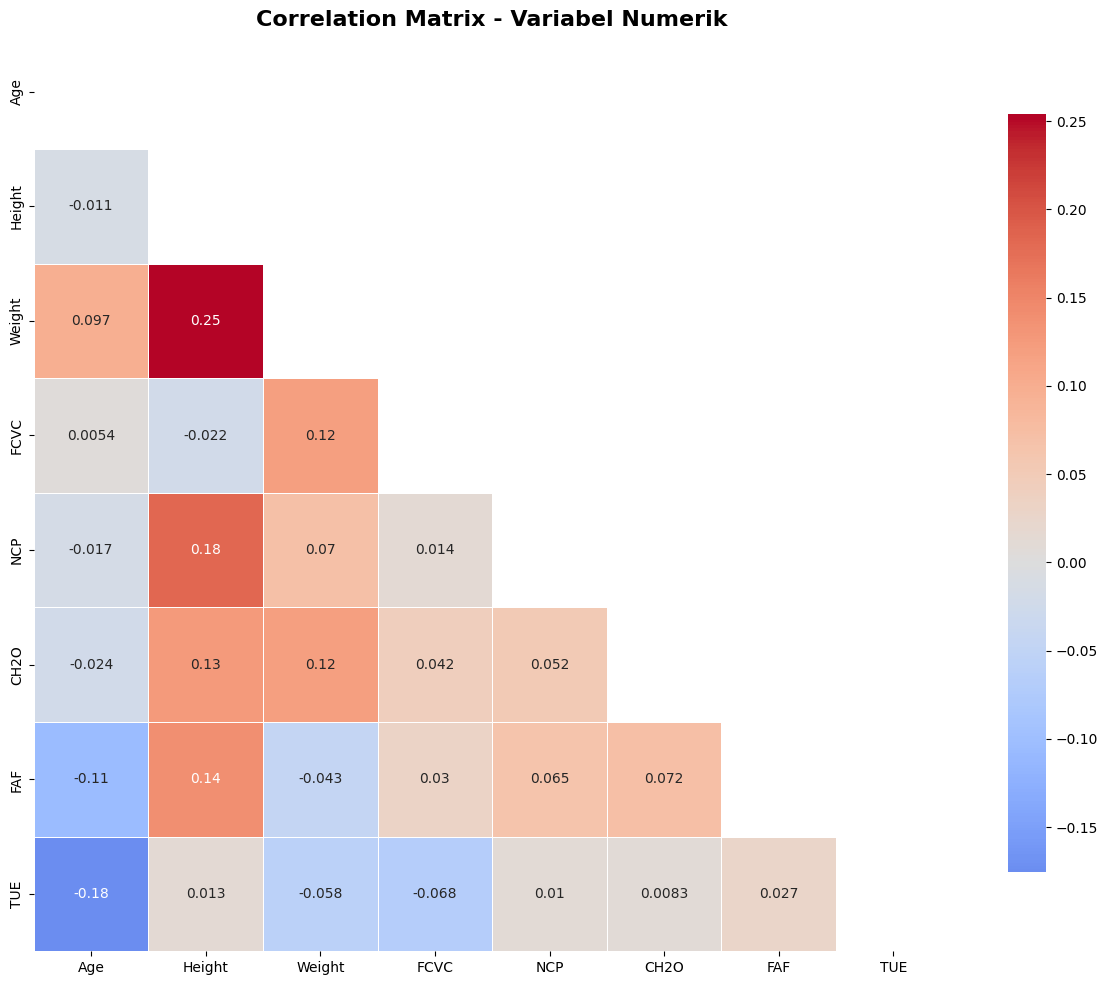


Tidak ada pasangan variabel dengan korelasi tinggi (>0.7)


In [26]:
# Matriks korelasi untuk variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Temukan pasangan yang sangat berkorelasi
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\nPasangan variabel dengan korelasi tinggi (>0.7):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("\nTidak ada pasangan variabel dengan korelasi tinggi (>0.7)")

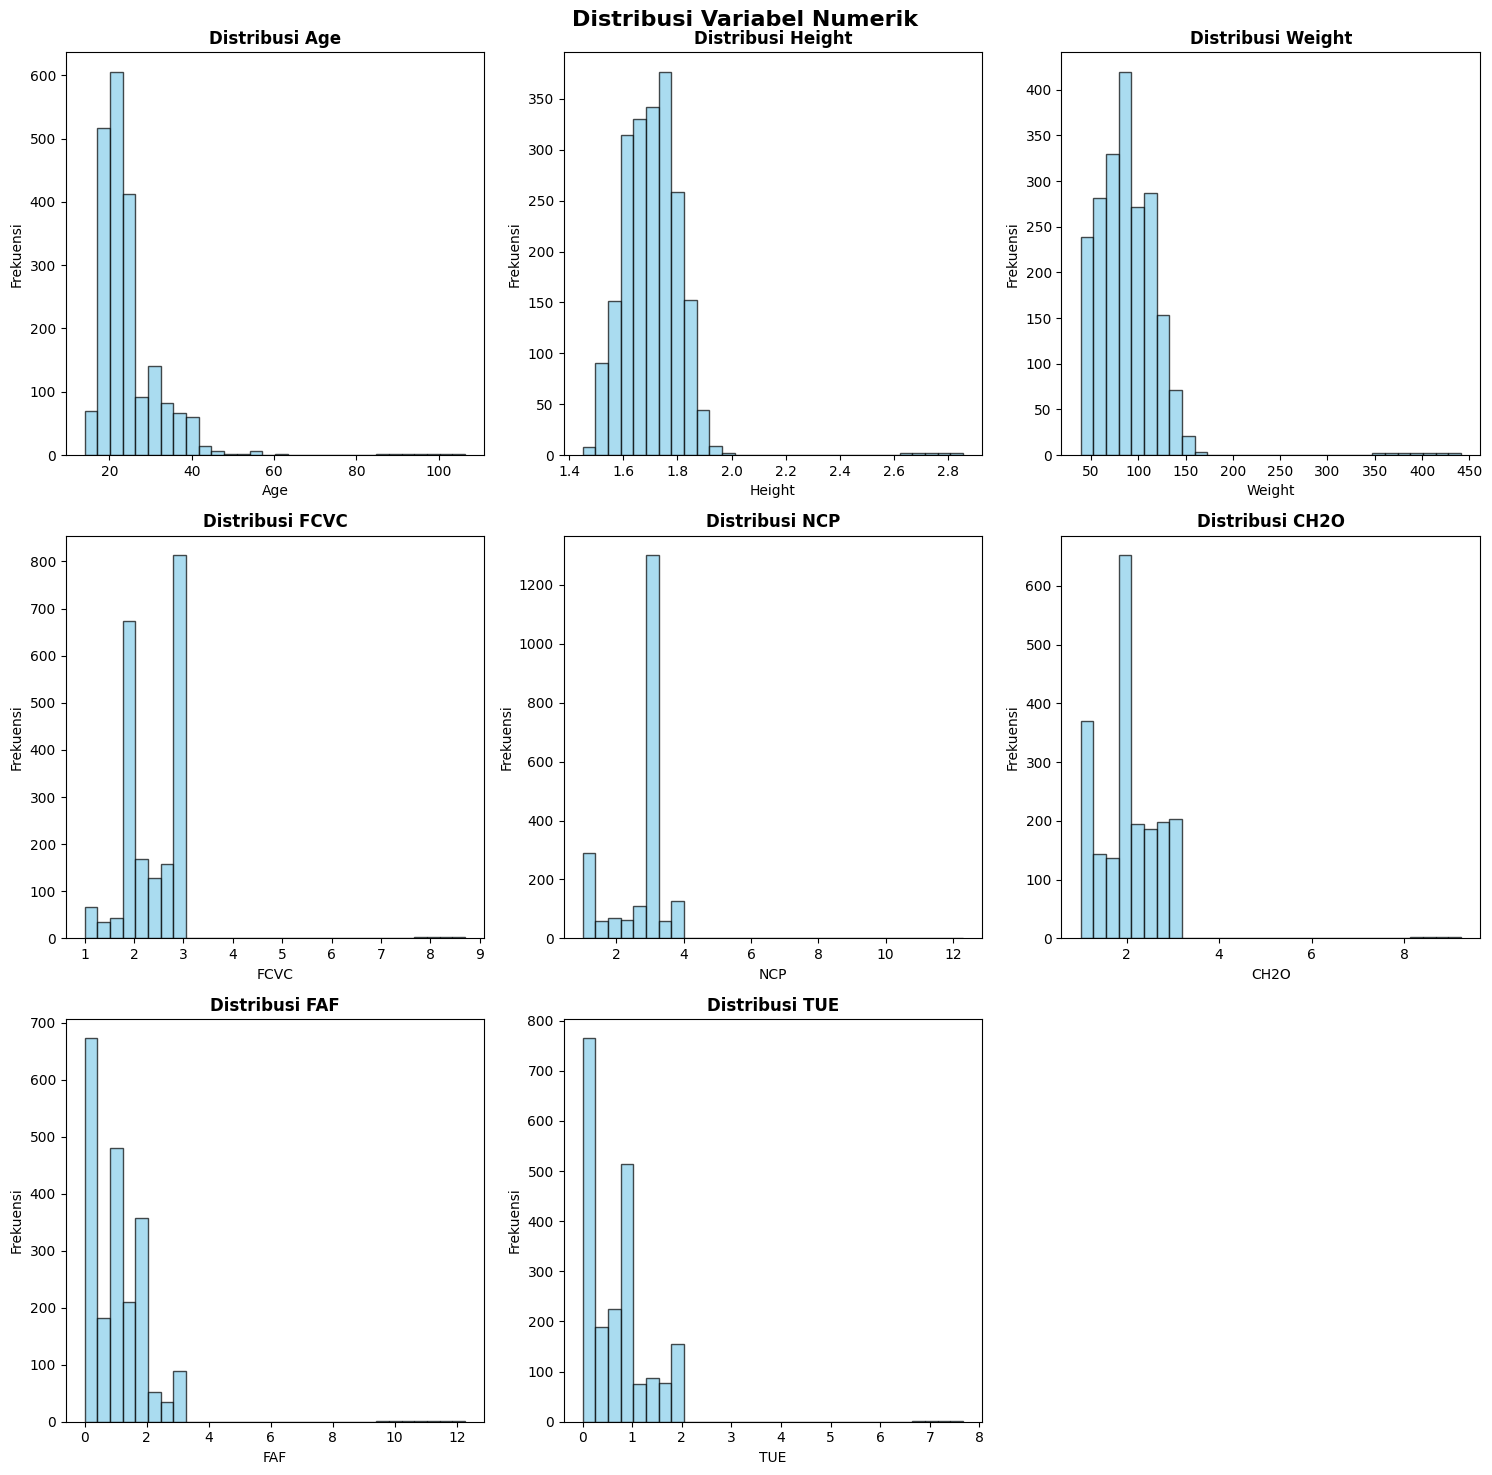

In [28]:
# Distribusi variabel numerik
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    # Tangani '?' sebagai nilai yang hilang untuk pembuatan plot
    data_clean = df[col][df[col] != '?']
    if len(data_clean) > 0:
        try:
            data_numeric = pd.to_numeric(data_clean, errors='coerce').dropna()
            if len(data_numeric) > 0:
                axes[i].hist(data_numeric, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                axes[i].set_title(f'Distribusi {col}', fontweight='bold')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frekuensi')
            else:
                axes[i].text(0.5, 0.5, f'No numeric data\nfor {col}',
                           ha='center', va='center', transform=axes[i].transAxes)
        except:
            axes[i].text(0.5, 0.5, f'Error plotting\n{col}',
                       ha='center', va='center', transform=axes[i].transAxes)
    else:
        axes[i].text(0.5, 0.5, f'No data\nfor {col}',
                   ha='center', va='center', transform=axes[i].transAxes)

# Sembunyikan subplot kosong
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distribusi Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

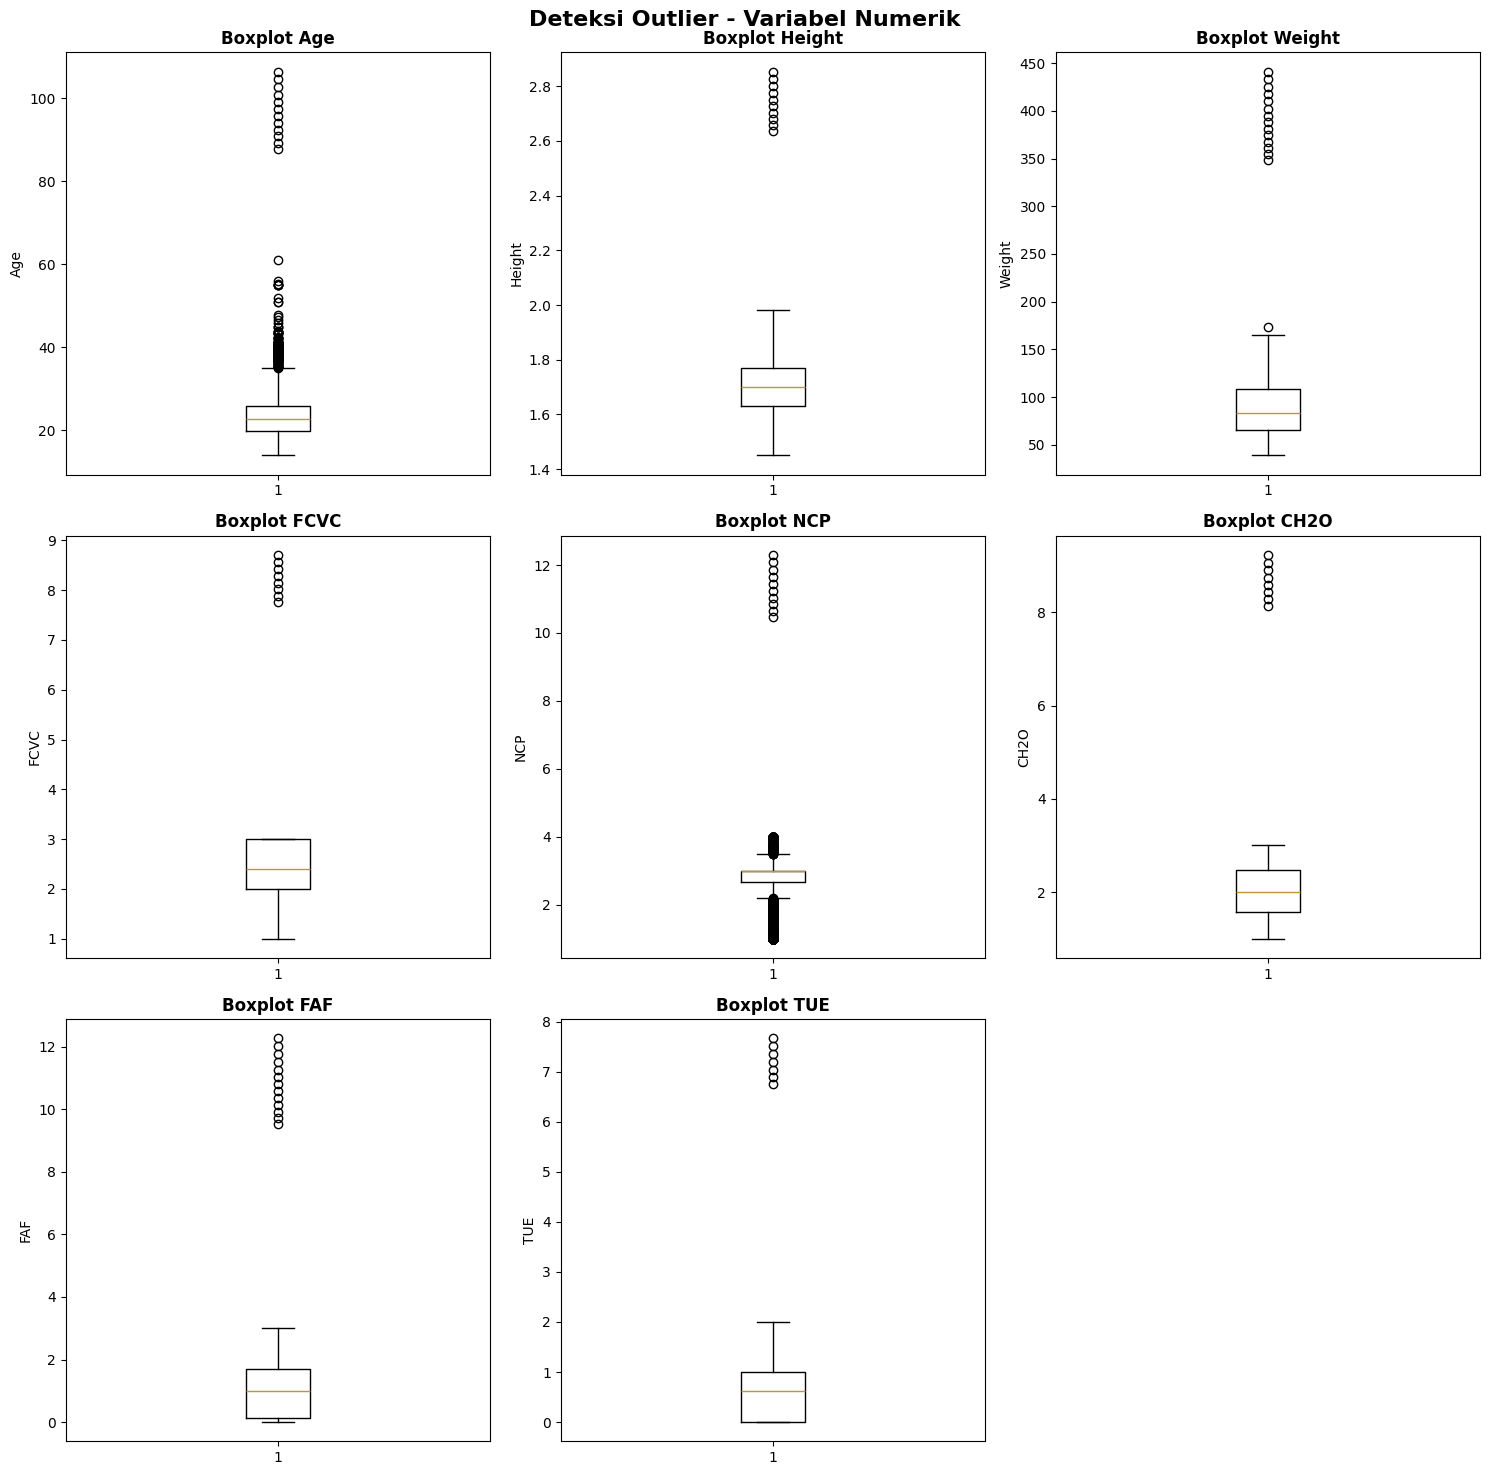

In [29]:
# Boxplot untuk deteksi outlier
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    # Tangani '?' sebagai nilai yang hilang untuk pembuatan plot
    data_clean = df[col][df[col] != '?']
    if len(data_clean) > 0:
        try:
            data_numeric = pd.to_numeric(data_clean, errors='coerce').dropna()
            if len(data_numeric) > 0:
                axes[i].boxplot(data_numeric)
                axes[i].set_title(f'Boxplot {col}', fontweight='bold')
                axes[i].set_ylabel(col)
            else:
                axes[i].text(0.5, 0.5, f'No numeric data\nfor {col}',
                           ha='center', va='center', transform=axes[i].transAxes)
        except:
            axes[i].text(0.5, 0.5, f'Error plotting\n{col}',
                       ha='center', va='center', transform=axes[i].transAxes)
    else:
        axes[i].text(0.5, 0.5, f'No data\nfor {col}',
                   ha='center', va='center', transform=axes[i].transAxes)

# Sembunyikan subplot kosong
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Deteksi Outlier - Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

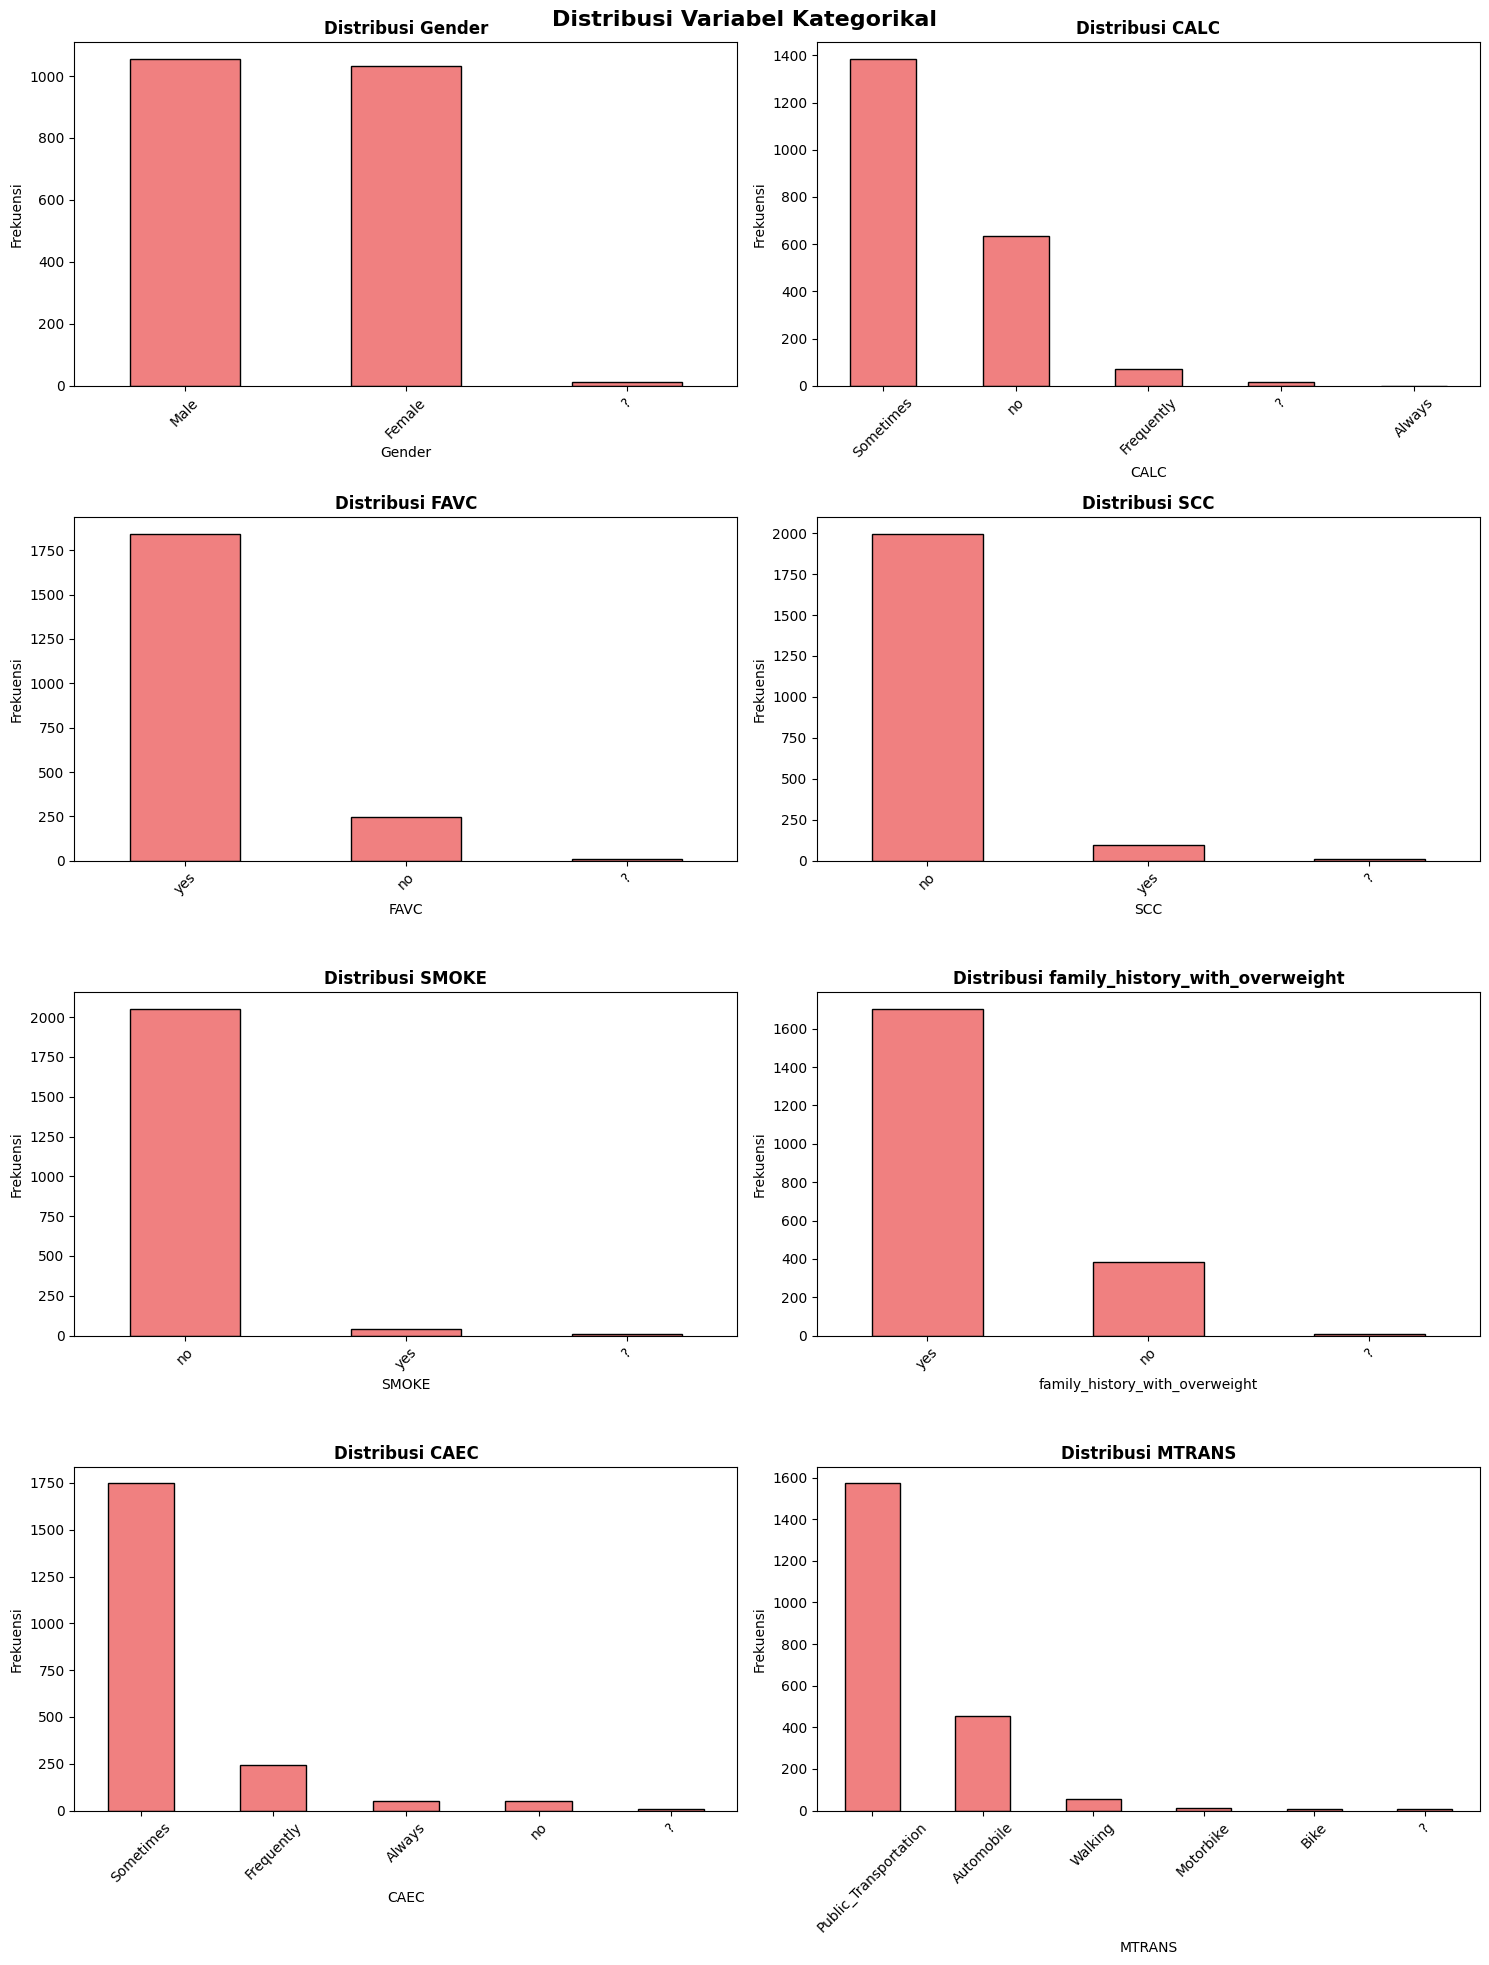

In [30]:
# Distribusi variabel kategoris
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

if categorical_cols:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=axes[i], color='lightcoral', edgecolor='black')
        axes[i].set_title(f'Distribusi {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frekuensi')
        axes[i].tick_params(axis='x', rotation=45)

    # Sembunyikan subplot kosong
    for i in range(len(categorical_cols), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Distribusi Variabel Kategorikal', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns to plot.")

### 2.5 Kesimpulan EDA

In [31]:
print("=" * 80)
print("KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

print("\n1. STRUKTUR DATASET:")
print(f"   - Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")
print(f"   - Terdapat {len(numeric_cols)} variabel numerik dan {len(categorical_cols)} variabel kategorikal")
print(f"   - Target variable 'NObeyesdad' memiliki {df['NObeyesdad'].nunique()} kelas")

print("\n2. KUALITAS DATA:")
# Count missing values (both NaN and '?')
total_missing = df.isnull().sum().sum()
total_question = sum((df[col] == '?').sum() for col in df.columns)
print(f"   - Missing values (NaN): {total_missing}")
print(f"   - Missing values ('?'): {total_question}")
print(f"   - Data duplikat: {df.duplicated().sum()}")

print("\n3. DISTRIBUSI TARGET:")
target_counts = df['NObeyesdad'].value_counts()
min_class = target_counts.min()
max_class = target_counts.max()
imbalance_ratio = max_class / min_class
print(f"   - Kelas terbanyak: {target_counts.index[0]} ({target_counts.iloc[0]} samples)")
print(f"   - Kelas tersedikit: {target_counts.index[-1]} ({target_counts.iloc[-1]} samples)")
print(f"   - Rasio ketidakseimbangan: {imbalance_ratio:.2f}")

print("\n4. KORELASI:")
if high_corr_pairs:
    print(f"   - Ditemukan {len(high_corr_pairs)} pasang variabel dengan korelasi tinggi (>0.7)")
    for pair in high_corr_pairs[:3]:  # Show top 3
        print(f"     * {pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("   - Tidak ada korelasi tinggi antar variabel numerik")

print("\n5. OUTLIERS:")
print("   - Beberapa variabel numerik menunjukkan adanya outliers ekstrem")
print("   - Perlu dilakukan penanganan outliers pada tahap preprocessing")

print("\n6. REKOMENDASI PREPROCESSING:")
print("   - Tangani missing values ('?' dan NaN)")
print("   - Lakukan encoding untuk variabel kategorikal")
print("   - Deteksi dan tangani outliers")
print("   - Normalisasi/standardisasi data numerik")
if imbalance_ratio > 2:
    print("   - Pertimbangkan teknik balancing untuk mengatasi ketidakseimbangan kelas")
print("=" * 80)

KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)

1. STRUKTUR DATASET:
   - Dataset memiliki 2111 baris dan 17 kolom
   - Terdapat 8 variabel numerik dan 8 variabel kategorikal
   - Target variable 'NObeyesdad' memiliki 7 kelas

2. KUALITAS DATA:
   - Missing values (NaN): 222
   - Missing values ('?'): 78
   - Data duplikat: 18

3. DISTRIBUSI TARGET:
   - Kelas terbanyak: Obesity_Type_I (351 samples)
   - Kelas tersedikit: Insufficient_Weight (272 samples)
   - Rasio ketidakseimbangan: 1.29

4. KORELASI:
   - Tidak ada korelasi tinggi antar variabel numerik

5. OUTLIERS:
   - Beberapa variabel numerik menunjukkan adanya outliers ekstrem
   - Perlu dilakukan penanganan outliers pada tahap preprocessing

6. REKOMENDASI PREPROCESSING:
   - Tangani missing values ('?' dan NaN)
   - Lakukan encoding untuk variabel kategorikal
   - Deteksi dan tangani outliers
   - Normalisasi/standardisasi data numerik


## 3. Data Preprocessing

### 3.1 Pembersihan Data dan Nilai yang Hilang

In [32]:
# Buat salinan dataset untuk praproses
df_processed = df.copy()

print("=" * 60)
print("DATA PREPROCESSING - CLEANING")
print("=" * 60)

# Ganti '?' dengan NaN
df_processed = df_processed.replace('?', np.nan)

# Periksa nilai yang hilang setelah penggantian
missing_summary = df_processed.isnull().sum()
print("Missing values setelah mengganti '?' dengan NaN:")
print(missing_summary[missing_summary > 0])

# Menangani nilai yang hilang untuk berbagai jenis kolom
print("\nMenangani missing values...")

# Untuk kolom kategoris, gunakan mode
# Pertahankan daftar categorical_features asli sebagaimana yang ditetapkan sebelum diproses
categorical_features = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_features:
    if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"  - {col}: filled with mode '{mode_value}'")

# Untuk kolom numerik, gunakan median
# Pertahankan daftar fitur_numerik asli sebagaimana yang ditetapkan sebelum diproses
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_features:
    if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
        # Ubah dulu ke angka, baru dapat median
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"  - {col}: filled with median {median_value:.2f}")

# Verifikasi tidak ada nilai yang hilang
remaining_missing = df_processed.isnull().sum().sum()
print(f"\nTotal missing values setelah cleaning: {remaining_missing}")

# Hapus duplikat
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
final_rows = len(df_processed)
print(f"\nData duplikat dihapus: {initial_rows - final_rows} baris")
print(f"Dataset final: {final_rows} baris")

DATA PREPROCESSING - CLEANING
Missing values setelah mengganti '?' dengan NaN:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
dtype: int64

Menangani missing values...
  - Gender: filled with mode 'Male'
  - CALC: filled with mode 'Sometimes'
  - FAVC: filled with mode 'yes'
  - SCC: filled with mode 'no'
  - SMOKE: filled with mode 'no'
  - family_history_with_overweight: filled with mode 'yes'
  - CAEC: filled with mode 'Sometimes'
  - MTRANS: fille

### 3.2 Deteksi dan Penanganan Outlier

In [33]:
# Deteksi outlier menggunakan metode IQR
print("=" * 60)
print("DETEKSI DAN PENANGANAN OUTLIERS")
print("=" * 60)

# Tentukan fitur numerik SETELAH pembersihan dan konversi
# Ini memastikan fitur tersebut diperlakukan sebagai tipe numerik
# Daftar 'numerical_features' dari Sel 18 sudah berisi nama kolom yang benar
# Kita dapat menggunakan daftar ini langsung pada kerangka data yang telah dibersihkan
numerical_features_cleaned = [col for col in numerical_features if col in df_processed.columns]

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    # Pastikan kolomnya numerik sebelum menghitung kuartil
    numeric_column = pd.to_numeric(data[column], errors='coerce')
    Q1 = numeric_column.quantile(0.25)
    Q3 = numeric_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter berdasarkan kolom bingkai data asli
    outliers = data[(numeric_column < lower_bound) | (numeric_column > upper_bound)]
    return outliers, lower_bound, upper_bound

# Mendeteksi outlier untuk setiap kolom numerik
outlier_summary = {}
for col in numerical_features_cleaned: # Gunakan daftar yang diperoleh setelah pembersihan
    if col in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, col)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df_processed)) * 100

        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower,
            'upper_bound': upper
        }

        print(f"{col}:")
        print(f"  - Outliers: {outlier_count} ({outlier_percentage:.2f}%)")
        print(f"  - Valid range: {lower:.2f} to {upper:.2f}")

        if outlier_count > 0:
            print(f"  - Min outlier: {outliers[col].min():.2f}")
            print(f"  - Max outlier: {outliers[col].max():.2f}")

# Tangani outlier menggunakan metode pembatasan (Winsorization)
print("\nMenangani outliers dengan metode capping...")
df_no_outliers = df_processed.copy()

for col in numerical_features_cleaned: # Gunakan daftar yang diperoleh setelah pembersihan
    if col in df_no_outliers.columns and outlier_summary[col]['count'] > 0:
        # Batasi outlier hingga persentil ke-5 dan ke-95
        # Pastikan kolom berupa angka sebelum menghitung persentil
        numeric_column = pd.to_numeric(df_no_outliers[col], errors='coerce')
        lower_cap = numeric_column.quantile(0.05)
        upper_cap = numeric_column.quantile(0.95)

        original_outliers = outlier_summary[col]['count']
        # Terapkan kliping ke kolom numerik
        df_no_outliers[col] = numeric_column.clip(lower=lower_cap, upper=upper_cap)

        # Periksa outlier yang tersisa
        new_outliers, _, _ = detect_outliers_iqr(df_no_outliers, col)
        print(f"  - {col}: {original_outliers} → {len(new_outliers)} outliers")

print("\n✅ Penanganan outlier diselesaikan menggunakan pembatasan persentil ke-5 hingga ke-95")

DETEKSI DAN PENANGANAN OUTLIERS
Age:
  - Outliers: 179 (8.56%)
  - Valid range: 10.97 to 35.02
  - Min outlier: 35.13
  - Max outlier: 106.44
Height:
  - Outliers: 11 (0.53%)
  - Valid range: 1.42 to 1.98
  - Min outlier: 1.98
  - Max outlier: 2.85
Weight:
  - Outliers: 15 (0.72%)
  - Valid range: 2.90 to 171.17
  - Min outlier: 173.00
  - Max outlier: 441.13
FCVC:
  - Outliers: 8 (0.38%)
  - Valid range: 0.50 to 4.50
  - Min outlier: 7.76
  - Max outlier: 8.71
NCP:
  - Outliers: 599 (28.65%)
  - Valid range: 2.31 to 3.42
  - Min outlier: 1.00
  - Max outlier: 12.30
CH2O:
  - Outliers: 8 (0.38%)
  - Valid range: 0.29 to 3.76
  - Min outlier: 8.14
  - Max outlier: 9.23
FAF:
  - Outliers: 13 (0.62%)
  - Valid range: -2.20 to 4.01
  - Min outlier: 9.52
  - Max outlier: 12.27
TUE:
  - Outliers: 7 (0.33%)
  - Valid range: -1.50 to 2.50
  - Min outlier: 6.75
  - Max outlier: 7.67

Menangani outliers dengan metode capping...
  - Age: 179 → 179 outliers
  - Height: 11 → 0 outliers
  - Weight: 

### 3.3 Rekayasa Fitur dan Encoding

In [35]:
print("=" * 60)
print("Rekayasa Fitur dan Encoding")
print("=" * 60)

# Membuat fitur BMI
df_engineered = df_no_outliers.copy()
# Pastikan kolom Weight dan Height bertipe numerik untuk perhitungan BMI
df_engineered['Weight'] = pd.to_numeric(df_engineered['Weight'], errors='coerce')
df_engineered['Height'] = pd.to_numeric(df_engineered['Height'], errors='coerce')
df_engineered['BMI'] = df_engineered['Weight'] / (df_engineered['Height'] ** 2)
print("✅ Fitur BMI berhasil dibuat")

# Membuat kategori umur
def categorize_age(age):
    if age < 18:
        return 'Teen'
    elif age < 25:
        return 'Young_Adult'
    elif age < 35:
        return 'Adult'
    elif age < 50:
        return 'Middle_Age'
    else:
        return 'Senior'

# Pastikan kolom Age bertipe numerik untuk pengkategorian umur
df_engineered['Age'] = pd.to_numeric(df_engineered['Age'], errors='coerce')
df_engineered['Age_Group'] = df_engineered['Age'].apply(categorize_age)
print("✅ Fitur Age_Group berhasil dibuat")

# Encoding biner untuk kolom yes/no
binary_columns = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
for col in binary_columns:
    if col in df_engineered.columns:
        df_engineered[f'{col}_encoded'] = (df_engineered[col] == 'yes').astype(int)
        print(f"✅ {col} → {col}_encoded (biner)")

# Encoding gender
df_engineered['Gender_encoded'] = (df_engineered['Gender'] == 'Male').astype(int)
print("✅ Gender → Gender_encoded (biner)")

# One-hot encoding untuk variabel kategori dengan banyak kelas
# Menggunakan daftar categorical_features dari Cell 18, kecuali yang sudah di-encoding biner
categorical_to_encode = [col for col in categorical_features if col not in binary_columns + ['Gender']] + ['Age_Group']
encoded_columns = []

for col in categorical_to_encode:
    if col in df_engineered.columns:
        # Membuat variabel dummy
        dummies = pd.get_dummies(df_engineered[col], prefix=col, drop_first=True)
        df_engineered = pd.concat([df_engineered, dummies], axis=1)
        encoded_columns.extend(dummies.columns.tolist())
        print(f"✅ {col} → One-hot encoded ({len(dummies.columns)} fitur)")

# Encoding target variable
label_encoder = LabelEncoder()
df_engineered['NObeyesdad_encoded'] = label_encoder.fit_transform(df_engineered['NObeyesdad'])
target_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"\n✅ Target variable berhasil di-encode:")
for original, encoded in target_mapping.items():
    print(f"   {original} → {encoded}")

print(f"\nTotal fitur setelah encoding: {df_engineered.shape[1]}")

Rekayasa Fitur dan Encoding
✅ Fitur BMI berhasil dibuat
✅ Fitur Age_Group berhasil dibuat
✅ FAVC → FAVC_encoded (biner)
✅ SCC → SCC_encoded (biner)
✅ SMOKE → SMOKE_encoded (biner)
✅ family_history_with_overweight → family_history_with_overweight_encoded (biner)
✅ Gender → Gender_encoded (biner)
✅ CALC → One-hot encoded (3 fitur)
✅ CAEC → One-hot encoded (3 fitur)
✅ MTRANS → One-hot encoded (4 fitur)
✅ Age_Group → One-hot encoded (3 fitur)

✅ Target variable berhasil di-encode:
   Insufficient_Weight → 0
   Normal_Weight → 1
   Obesity_Type_I → 2
   Obesity_Type_II → 3
   Obesity_Type_III → 4
   Overweight_Level_I → 5
   Overweight_Level_II → 6

Total fitur setelah encoding: 38


### 3.4 Feature Selection

In [36]:
print("=" * 60)
print("PEMILIHAN FITUR")
print("=" * 60)

# Menentukan kumpulan fitur akhir
# Menggunakan fitur hasil rekayasa dan fitur hasil encoding
# Mendefinisikan ulang fitur numerik setelah memastikan bertipe numerik
numerical_features_processed = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
numerical_features_processed = [col for col in numerical_features_processed if col in df_engineered.columns]

feature_columns = (
    numerical_features_processed +  # Fitur numerik (sudah bertipe yang benar)
    [col for col in df_engineered.columns if col.endswith('_encoded')] +  # Fitur hasil encoding biner
    encoded_columns  # Fitur hasil one-hot encoding
)

# Menghapus target dari daftar fitur
feature_columns = [col for col in feature_columns if 'NObeyesdad' not in col]

# Memastikan semua kolom ada di dataframe dan unik (tanpa duplikasi)
final_features = [col for col in feature_columns if col in df_engineered.columns]
final_features = list(dict.fromkeys(final_features))  # Menghapus duplikasi sambil mempertahankan urutan

print(f"Fitur terpilih ({len(final_features)}):")
for i, feature in enumerate(final_features, 1):
    print(f"  {i:2d}. {feature}")

# Membuat dataset akhir untuk modeling
X = df_engineered[final_features]
y = df_engineered['NObeyesdad_encoded']

print(f"\nBentuk dataset akhir:")
print(f"  Fitur (X): {X.shape}")
print(f"  Target (y): {y.shape}")
print(f"  Kelas target: {sorted(y.unique())}")

PEMILIHAN FITUR
Fitur terpilih (27):
   1. Age
   2. Height
   3. Weight
   4. BMI
   5. FCVC
   6. NCP
   7. CH2O
   8. FAF
   9. TUE
  10. FAVC_encoded
  11. SCC_encoded
  12. SMOKE_encoded
  13. family_history_with_overweight_encoded
  14. Gender_encoded
  15. CALC_Frequently
  16. CALC_Sometimes
  17. CALC_no
  18. CAEC_Frequently
  19. CAEC_Sometimes
  20. CAEC_no
  21. MTRANS_Bike
  22. MTRANS_Motorbike
  23. MTRANS_Public_Transportation
  24. MTRANS_Walking
  25. Age_Group_Middle_Age
  26. Age_Group_Teen
  27. Age_Group_Young_Adult

Bentuk dataset akhir:
  Fitur (X): (2091, 27)
  Target (y): (2091,)
  Kelas target: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


### 3.5 Data Balancing

In [39]:
print("=" * 60)
print("PEMBALANCEAN KELAS")
print("=" * 60)

# Cek distribusi kelas pada target
original_distribution = Counter(y)
print("Distribusi kelas asli:")
for class_label in sorted(original_distribution.keys()):
    count = original_distribution[class_label]
    percentage = (count / len(y)) * 100
    original_class = label_encoder.inverse_transform([class_label])[0]
    print(f"  {original_class} ({class_label}): {count} ({percentage:.1f}%)")

# Cek apakah perlu dilakukan balancing
min_class_count = min(original_distribution.values())
max_class_count = max(original_distribution.values())
imbalance_ratio = max_class_count / min_class_count

print(f"\nRasio ketidakseimbangan: {imbalance_ratio:.2f}")

if imbalance_ratio > 2.0:
    print("\n🔄 Menerapkan SMOTE untuk pembalancean kelas...")

    # Terapkan SMOTE
    smote = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    # Cek distribusi kelas setelah SMOTE
    balanced_distribution = Counter(y_balanced)
    print("\nDistribusi kelas setelah SMOTE:")
    for class_label in sorted(balanced_distribution.keys()):
        count = balanced_distribution[class_label]
        percentage = (count / len(y_balanced)) * 100
        original_class = label_encoder.inverse_transform([class_label])[0]
        print(f"  {original_class} ({class_label}): {count} ({percentage:.1f}%)")

    print(f"\nUkuran dataset: {len(y)} → {len(y_balanced)} (+{len(y_balanced) - len(y)} sampel sintetis)")

    # Gunakan data yang sudah seimbang
    X_final = X_balanced
    y_final = y_balanced

else:
    print("\n✅ Dataset sudah relatif seimbang")
    X_final = X
    y_final = y

print(f"\nDataset akhir untuk modeling:")
print(f"  Bentuk: {X_final.shape}")
print(f"  Jumlah kelas: {len(np.unique(y_final))}")

PEMBALANCEAN KELAS
Distribusi kelas asli:
  Insufficient_Weight (0): 269 (12.9%)
  Normal_Weight (1): 284 (13.6%)
  Obesity_Type_I (2): 351 (16.8%)
  Obesity_Type_II (3): 297 (14.2%)
  Obesity_Type_III (4): 324 (15.5%)
  Overweight_Level_I (5): 276 (13.2%)
  Overweight_Level_II (6): 290 (13.9%)

Rasio ketidakseimbangan: 1.30

✅ Dataset sudah relatif seimbang

Dataset akhir untuk modeling:
  Bentuk: (2091, 27)
  Jumlah kelas: 7


### 3.6 Data Normalization

In [40]:
print("=" * 60)
print("NORMALISASI DATA")
print("=" * 60)

# Memisahkan data sebelum normalisasi untuk mencegah data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_final
)

print(f"Data dibagi menjadi:")
print(f"  Data pelatihan: {X_train.shape[0]} sampel")
print(f"  Data pengujian: {X_test.shape[0]} sampel")

# Identifikasi kolom numerik untuk scaling
# Menggunakan daftar fitur numerik setelah pembersihan dan rekayasa fitur
numerical_features_final = numerical_features_processed # Daftar ini sudah didefinisikan di Cell 24
numerical_features_final = [col for col in numerical_features_final if col in X_train.columns]

print(f"\nFitur numerik yang akan diskalakan: {numerical_features_final}")

# Inisialisasi dan fitting scaler hanya pada data training
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Melakukan scaling pada fitur numerik
if numerical_features_final:  # Cek apakah ada fitur numerik yang akan diskalakan
    X_train_scaled[numerical_features_final] = scaler.fit_transform(X_train[numerical_features_final])
    X_test_scaled[numerical_features_final] = scaler.transform(X_test[numerical_features_final])
    print("\n✅ Normalisasi (standardisasi) selesai")
    print(f"   Rata-rata fitur setelah scaling (harus mendekati 0): {X_train_scaled[numerical_features_final].mean().mean():.6f}")
    print(f"   Standar deviasi fitur setelah scaling (harus mendekati 1): {X_train_scaled[numerical_features_final].std().mean():.6f}")
else:
    print("\n⚠️ Tidak ada fitur numerik yang terdeteksi untuk distandarisasi.")

NORMALISASI DATA
Data dibagi menjadi:
  Data pelatihan: 1672 sampel
  Data pengujian: 419 sampel

Fitur numerik yang akan diskalakan: ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

✅ Normalisasi (standardisasi) selesai
   Rata-rata fitur setelah scaling (harus mendekati 0): 0.000000
   Standar deviasi fitur setelah scaling (harus mendekati 1): 1.000299


### Kesimpulan Preprocessing

In [43]:
# Tampilkan ringkasan preprocessing
print("\n" + "=" * 60)
print("RINGKASAN PREPROCESSING")
print("=" * 60)
print(f"✅ Penanganan Missing Value selesai")
print(f"✅ Penanganan outlier dengan pembatasan pada persentil 5 hingga 95")
print(f"✅ Variabel kategorikal sudah di-encode")
print(f"✅ Fitur baru berhasil dibuat (BMI, Age_Group)")
if imbalance_ratio > 2.0:
    print(f"✅ Ketidakseimbangan kelas sudah diatasi dengan SMOTE")
if numerical_features_final:
    print(f"✅ Fitur numerik sudah dinormalisasi (standardisasi)")
else:
     print(f"⚠️ Fitur numerik tidak dinormalisasi (tidak ditemukan fitur numerik)")
print(f"\nSiap untuk modeling dengan {X_train_scaled.shape[1]} fitur")
print("=" * 60)


RINGKASAN PREPROCESSING
✅ Penanganan Missing Value selesai
✅ Penanganan outlier dengan pembatasan pada persentil 5 hingga 95
✅ Variabel kategorikal sudah di-encode
✅ Fitur baru berhasil dibuat (BMI, Age_Group)
✅ Fitur numerik sudah dinormalisasi (standardisasi)

Siap untuk modeling dengan 27 fitur


## 4. Pemodelan dan Evaluasi

### 4.1 Model Training

In [44]:
print("=" * 60)
print("MODEL TRAINING DAN EVALUASI")
print("=" * 60)

# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
model_results = {}
trained_models = {}

print("Training models...\n")

for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation score
    # Ensure X_train_scaled has enough samples for each fold for cross-validation
    if X_train_scaled.shape[0] >= 5: # Check if there are at least 5 samples for cv=5
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    else:
        cv_mean = np.nan # Cannot compute CV score
        cv_std = np.nan
        print("  ⚠️ Not enough samples in training data for 5-fold cross-validation.")

    # Store results
    model_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = model

    print(f"  ✅ Accuracy: {accuracy:.4f}, CV: {cv_mean:.4f} (±{cv_std:.4f})")

MODEL TRAINING DAN EVALUASI
Training models...

Training Random Forest...
  ✅ Accuracy: 0.9714, CV: 0.9617 (±0.0162)
Training Gradient Boosting...
  ✅ Accuracy: 0.9499, CV: 0.9563 (±0.0152)
Training SVM...
  ✅ Accuracy: 0.9284, CV: 0.9145 (±0.0141)
Training Logistic Regression...
  ✅ Accuracy: 0.8401, CV: 0.8373 (±0.0104)
Training K-Nearest Neighbors...
  ✅ Accuracy: 0.8544, CV: 0.8224 (±0.0112)
Training Decision Tree...
  ✅ Accuracy: 0.9379, CV: 0.9258 (±0.0134)
Training Naive Bayes...
  ✅ Accuracy: 0.5227, CV: 0.5120 (±0.0203)


In [46]:
print("\n" + "=" * 60)
print("PERBANDINGAN PERFORMA MODEL")
print("=" * 60)

# Membuat DataFrame hasil evaluasi model
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Akurasi': [model_results[model]['accuracy'] for model in model_results],
    'Presisi': [model_results[model]['precision'] for model in model_results],
    'Recall': [model_results[model]['recall'] for model in model_results],
    'F1-Score': [model_results[model]['f1_score'] for model in model_results],
    'Rata-rata CV': [model_results[model]['cv_mean'] for model in model_results],
    'Std CV': [model_results[model]['cv_std'] for model in model_results]
})

# Mengurutkan berdasarkan akurasi, dengan penanganan NaN pada Rata-rata CV jika sampel tidak cukup
results_df = results_df.sort_values('Akurasi', ascending=False).reset_index(drop=True)
display(results_df.round(4))

# Menentukan model terbaik
# Pastikan results_df tidak kosong sebelum mengakses iloc
if not results_df.empty:
    best_model_name = results_df.iloc[0]['Model']
    best_model = trained_models[best_model_name]
    best_accuracy = results_df.iloc[0]['Akurasi']
    print(f"\n🏆 Model Terbaik: {best_model_name} (Akurasi: {best_accuracy:.4f})")
else:
    best_model_name = None
    best_model = None
    best_accuracy = 0.0
    print("\n⚠️ Tidak ada model yang berhasil dilatih atau dievaluasi.")


PERBANDINGAN PERFORMA MODEL


,Model,Akurasi,Presisi,Recall,F1-Score,Rata-rata CV,Std CV
0,Random Forest,0.9714,0.9720,0.9714,0.9713,0.9617,0.0162
1,Gradient Boosting,0.9499,0.9516,0.9499,0.9498,0.9563,0.0152
2,Decision Tree,0.9379,0.9393,0.9379,0.9380,0.9258,0.0134
3,SVM,0.9284,0.9304,0.9284,0.9288,0.9145,0.0141
4,K-Nearest Neighbors,0.8544,0.8600,0.8544,0.8472,0.8224,0.0112
5,Logistic Regression,0.8401,0.8399,0.8401,0.8359,0.8373,0.0104
6,Naive Bayes,0.5227,0.5356,0.5227,0.4623,0.5120,0.0203



🏆 Model Terbaik: Random Forest (Akurasi: 0.9714)
